# Galaxia: Generating synthetic surveys

## Parameters/outputs: 

For files named test1_*, they are contained in the file $\texttt{test1parameters}$, which is located in the /u/casey_lam/scratch directory on sloop. In particular, we try to get all stars (so magnitude limits are -1000 to 1000), we want a full sky survey (so geometryOption is set to 0), and fSample is 10${}^{-6}$ such that the computer doesn't become stupid slow. 

For files named testLOS_*, they are contained in the file $\texttt{testLOSparameters}$, which is also located in /u/casey_lam/scratch. Here, we are considering the line of sight to a particular OGLE event. Again we want all stars, so magnitude limits are -1000 to 1000, the patch of sky is OGLE's field of view (35' x 35' = 0.34 deg${}^2$) so the surveyArea is set to 0.34. (The first time I ran this, I left fSample = 1 since I figured it wouldn't be that many stars... it ended up making 155 million stars, so I reran it with an fSample = 10${}^{-4}$.)

The relevant outputs are 3D position, proper motions, and brightness at several particular filters (probably R and K band.)

## Coordinate system (Heliocentric/Galactic to Galactocentric)

Personal point of confusion: GALACTIC and GALACTOCENTRIC coordinates are NOT the same thing!!! Galactic coordinates use the origin as the COM of the Solar System (which is basically the sun.) This is the "heliocentric" coordinate system (i.e. Heliocentric = Galactic). Galactocentric coordinates, on the other hand, are coordinates that use the center of the Milky Way as the origin of the coordinate system.

ARGGGGGGGGG

Anyways, the first step is figuring out the coordinate system used. /px, /py, and /pz are the x, y, z heliocentric positions given in kpc. The first step is to figure out what the orientation of the axes are.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import astropy.units as u
import astropy.coordinates as coord

In [2]:
#load px, py, pz (cartesian heliocentric coordinates) from galaxia
HCx = np.loadtxt("test1_px") #kpc
HCy = np.loadtxt("test1_py") #kpc
HCz = np.loadtxt("test1_pz") #kpc

#load vx, vy, vz (cartesian heliocentric velocities) from galaxia
HCxvel = np.loadtxt("test1_vx") #km/s
HCyvel = np.loadtxt("test1_vy") #km/s
HCzvel = np.loadtxt("test1_vz") #km/s

Below are plots of the MW star distribution in heliocentric/galactic coordinates!

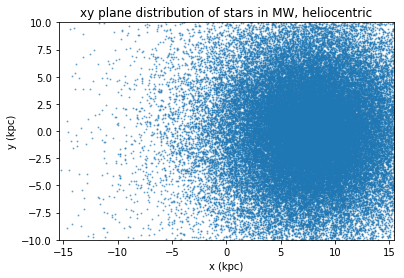

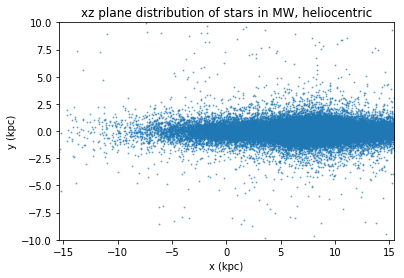

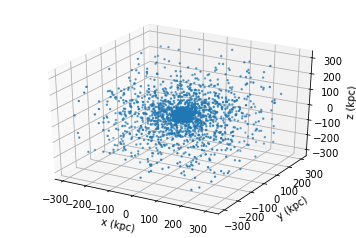

In [3]:
#slice of the x-y plane
plt.plot(HCx,HCy,'.', alpha=0.5, ms=2)
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("xy plane distribution of stars in MW, heliocentric")
plt.show()

#slice of the x-z plane
plt.plot(HCx,HCz,'.', alpha=0.5, ms=2)
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("xz plane distribution of stars in MW, heliocentric")
plt.show()

#full 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(HCx, HCy, HCz, s = 2)

ax.set_xlabel('x (kpc)')
ax.set_ylabel('y (kpc)')
ax.set_zlabel('z (kpc)')

plt.show()

Let's convert from Heliocentric to Galactocentric coordinates. /center gives the position and velocity of sun in galactocentric coordinates, where the first 3 coordinates are position in kpc and the last three velocity in km/s. To go between HC and GC coordinates, we just add the respective sun value to the HC coordinate to get the GC coordinate. (I think this is what they're doing in the IDL example on the Galaxia documentation website.)

In [4]:
sun = np.loadtxt("test1_center") 
#first three values are positions in kpc
#last three values are velocities in km/s

GCx = HCx + sun[0]
GCy = HCy + sun[1]
GCz = HCz + sun[2]

GCxvel = HCxvel + sun[3]
GCyvel = HCyvel + sun[4]
GCzvel = HCzvel + sun[5]

Now, plots of the MW star distribution in GALACTOCENTRIC coordinates!

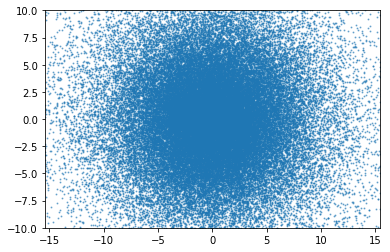

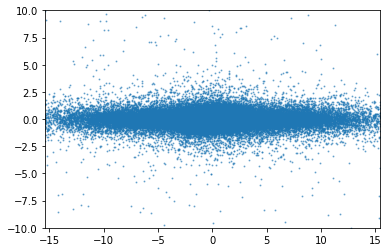

In [5]:
#slice of the x-y plane
plt.plot(GCx,GCy,'.', alpha=0.5, ms=2)
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

#slice of the x-z plane
plt.plot(GCx,GCz,'.', alpha=0.5, ms=2)
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

# Plots, plots, plots

## Number of stars vs distance from GC

Below are some histograms concerning the number of stars as a function of distance from the Galactic Center.

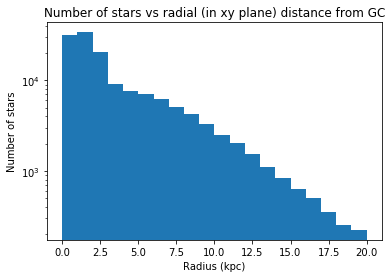

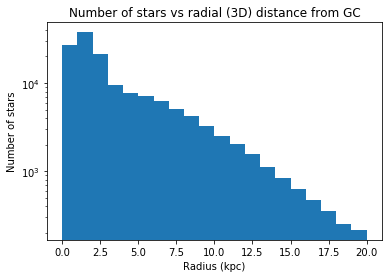

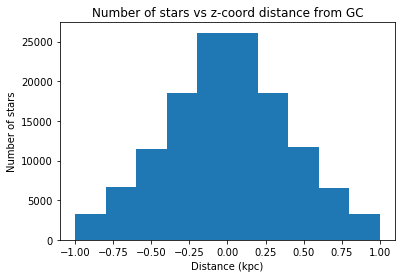

In [6]:
#radius in xy-plane
radiusGCxy = []
for i in np.arange(len(GCx)):
    radiusGCxy.append(np.sqrt(GCx[i]**2 + GCy[i]**2))
    
plt.hist(radiusGCxy,bins=np.arange(21))
plt.xlabel("Radius (kpc)")
plt.ylabel("Number of stars")
plt.yscale('log')
plt.title("Number of stars vs radial (in xy plane) distance from GC")
plt.show()

#radius in 3D
radiusGC = []
for i in np.arange(len(GCx)):
    radiusGC.append(np.sqrt(GCx[i]**2 + GCy[i]**2 + GCz[i]**2))
plt.hist(radiusGC,bins=np.arange(21))
plt.xlabel("Radius (kpc)")
plt.ylabel("Number of stars")
plt.yscale('log')
plt.title("Number of stars vs radial (3D) distance from GC")
plt.show()

#vertical distance from xy-plane
plt.hist(GCz,range=[-1,1])
plt.xlabel("Distance (kpc)")
plt.ylabel("Number of stars")
#plt.yscale('log')
plt.title("Number of stars vs z-coord distance from GC")
plt.show()

## Surface density of stars vs distance from GC (in the plane)

The plot below is just a sanity check plot (to make sure I know how to go between np.histogram and plt.hist)

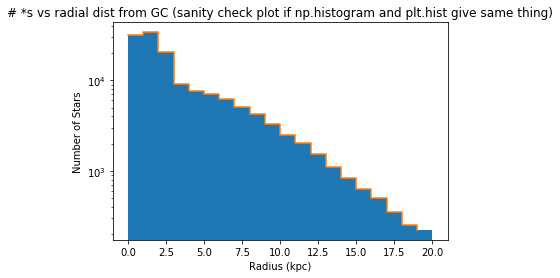

In [7]:
#just to prove that both plt.hist and np.histogram are plotting the same thing
plt.hist(radiusGCxy,bins=np.arange(21))
hist, binedges = np.histogram(radiusGCxy,bins=np.arange(21))
plt.plot(binedges[:-1], hist, drawstyle='steps-post')
plt.xlabel("Radius (kpc)")
plt.ylabel("Number of Stars")
plt.yscale('log')
plt.title("# *s vs radial dist from GC (sanity check plot if np.histogram and plt.hist give same thing)")
plt.show()

The plot below is surface density of stars in the Galactic Plane, as a function from distance from the Galactic Center. This is a check against the expectation that in the disk, there should be an exponential decrease in the surface density as a function of increasing radius from the Galactic Center.

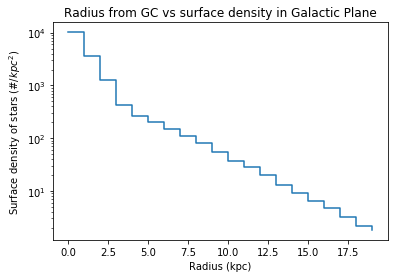

In [8]:
#surface area = annular region between r1 and r2 = pi*(r2^2 - r1^2)
radii = np.arange(21)
areas = np.pi*radii**2
annulararea = np.diff(areas)

hist, binedges = np.histogram(radiusGCxy,bins=np.arange(21))
surfdens = hist/annulararea
plt.plot(binedges[:-1], surfdens, drawstyle='steps-post')
plt.xlabel("Radius (kpc)")
plt.ylabel("Surface density of stars (#/$kpc^2$)")
plt.yscale('log')
plt.title("Radius from GC vs surface density in Galactic Plane")
plt.show()